In [22]:
import dbCycles
import datetime
import pandas as pd
import plotly.express as px

In [8]:
def getFormattedDate(_date=None, shiftDays=0):
    formatString = "%Y-%m-%d"
    if _date == None:
        _date = datetime.datetime.now()
    else:
        _date = datetime.strptime(_date, formatString)
    _date = _date - datetime.timedelta(days=shiftDays)

    return _date.strftime(formatString)
#Looks at past data per cycles. First need to go back per cycle or number of
# days. Query DB: Select Date when active = 1. Then query each cycle per
# query. Add Plot.ly plot. This should be called from the front end?
def getHistoricDataV2(datePresent, numOfCycles=3):
    
    #Fetch start date of cycles
    data = db.getCycleDates(numOfCycles)

    #https://stackoverflow.com/questions/10632839/transform-list-of-tuples-into-a-flat-list-or-a-matrix
    startDateList = list(sum(data, ()))
    
    #Add today's date to list. Reverse to start with most recent
    startDateList.append( getFormattedDate() )    
    startDateList.reverse()
    
    #Create empty list to store each DF. Each DF is a cycle
    global dfs
    dfs = []
    
    #Loop through start dates except last date
    for idx,startDate in enumerate(startDateList[:-1]):
        endDate = startDateList[idx+1]
    
        rawDataList = db.getActiveRecordsForDateRange(startDate, endDate)

        title = ['ID', 'Record Date', 'Active', 'TimeStamp', 'Monitor', 'SexyTime',
                 'Green Day', 'New Cycle']

        tempDF = pd.DataFrame(rawDataList)
        tempDF.columns = title

        tempDF.sort_values('Record Date', inplace=True, ascending=False)
        
        #Need to remove row 1 if idx > 1
        
        dfs.append(tempDF)
    
    
    
db = dbCycles.cycleDBClass()

getHistoricDataV2(None)

['2022-09-27', '2022-09-12', '2022-08-27', '2022-08-11']


In [29]:
dfs[0]

,ID,Record Date,Active,TimeStamp,Monitor,SexyTime,Green Day,New Cycle
0,1,2022-09-27,1,2022-09-27 21:43:09.137888,5,0,1,0
1,2,2022-09-26,1,2022-09-26 21:43:10.337144,4,0,0,0
2,3,2022-09-25,1,2022-09-25 21:43:10.390629,3,0,1,0
3,4,2022-09-24,1,2022-09-24 21:43:10.441803,11,1,1,0
4,5,2022-09-23,1,2022-09-23 21:43:10.490332,8,1,1,0
5,6,2022-09-22,1,2022-09-22 21:43:10.550775,2,1,1,0
6,7,2022-09-21,1,2022-09-21 21:43:10.596313,3,0,1,0
7,8,2022-09-20,1,2022-09-20 21:43:10.658630,7,1,1,0
8,9,2022-09-19,1,2022-09-19 21:43:10.696904,12,0,1,0
9,10,2022-09-18,1,2022-09-18 21:43:10.706600,23,1,0,0


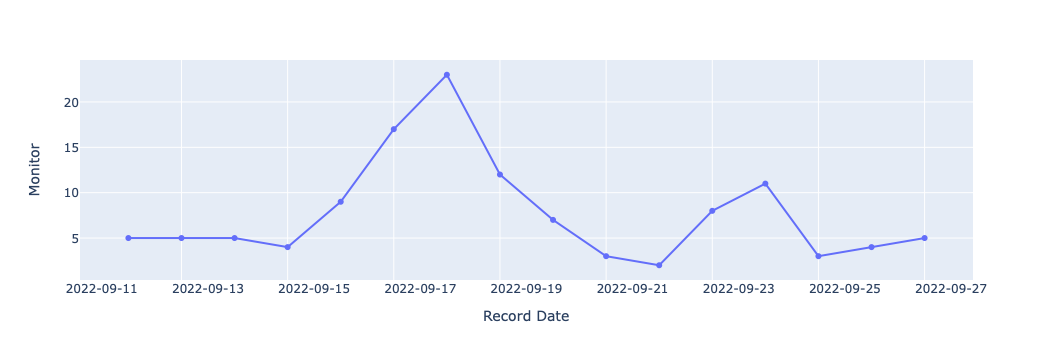

In [28]:
fig = px.line(dfs[0], x='Record Date', y='Monitor', markers=True)

#Format date and center point 
fig.update_xaxes(tickformat='%Y-%m-%d', ticklabelmode='period')

#Add Count above or below plot

#Add lines per date or split up background - https://community.plotly.com/t/px-timeline-vertical-line-to-indicate-certain-date/55137/2

#Add Green/Red days - colorscale - https://github.com/plotly/plotly.js/issues/5238

#Export to HTML - https://plotly.com/python-api-reference/generated/plotly.io.to_html.html

#Do Export first

fig.show()